# Spotify recommender

#### Steps to follow:
**1. Web Scraping**: Create a list of top_100_songs and make a simple recommender

**2. API wrappers**: Create a spotify playlist with 5000 songs

**3. Unsupervised Learning**: K-means clustering

**4. Song recommender**: If the input song is in top_100_songs list, it will recommend random song from the list. If it is not, it will recommend a song from the same cluster from spotify playlist


### Part 1: Web Scraping: Create a list of top_100_songs and make a simple recommender

In [93]:
#importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. find url and store it in a variable
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
# 2. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [4]:
# 3. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
#initialize empty lists
title = []
artist = []


# define the number of iterations of our for loop
num_iter = len(soup.select("cite.title"))

title_list = soup.select("cite.title")
artist_list = soup.select("em.artist")


# iterate through the result set and retrive all the data
for i in range(num_iter):
    title.append(title_list[i].get_text())
    artist.append(artist_list[i].get_text())

In [6]:
# genre = []
# genre_list = soup.select('div.chart-content.col-xs-12.col-sm-8 > ul >li >a')
# genre_new_release = soup.select('div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(2) > a')

# num = len(soup.select('div.chart-content.col-xs-12.col-sm-8 > ul >li >a'))
# num1 = len(soup.select('div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(2) > a'))

# for i in range(num):
#     if genre_list[i].get_text() != 'New Release':
#         genre.append(genre_list[i].get_text())
#     else:
#         for i in range(num1):
#             genre.append(genre_new_release[i].get_text())   

In [7]:
top_100_songs = pd.DataFrame({"title":title, "artist":artist})

In [8]:
top_100_songs['title'] = top_100_songs['title'].str.lower()
top_100_songs['artist'] = top_100_songs['artist'].str.lower()

In [9]:
top_100_songs.head()

,title,artist
0,last night,morgan wallen
1,flowers,miley cyrus
2,nasty (extended version),russ
3,fast car,luke combs
4,calm down,rema & selena gomez


In [10]:
# sending it to csv file
top_100_songs.to_csv('top_100_songs.csv', index = False)

Creating a recommender where the user inputs a song title and check if that song is in the list you created.   If it is,  give a different random song and artist from the list.  If it is not on the list, let the user know that you have no recommendation at this time.

In [11]:
song = input("Enter a song that you love: ")

Enter a song that you love: flowers


In [12]:
if top_100_songs['title'].str.lower().str.contains(str(song).lower()).any() == True:
        print('here what I found for you! ')
        print(top_100_songs['title'].sample())
else:
        print('I have no recommendation at this time')

here what I found for you! 
0    last night
Name: title, dtype: object


### Part 2: API wrappers: Create a spotify playlist with 5000 songs

My plan is to create a playlist from various artists

I will follow the plan below:

**different playlists  >>> artist names >>> 10 songs from each artist**

In [13]:
# importing libraries
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [14]:
secrets_file = open("../secrets.txt","r")

In [15]:
string = secrets_file.read()

In [17]:
#string.split('\n')

In [18]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [86]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

**I found different lists from different times, I will pull them now**

In [20]:
# 1.  50's 150 >> 37i9dQZF1DWSV3Tk4GO2fq
# 2.  60's 100 >> 3SbE5Sk5MWtNc0GRTU0X6d
# 3.  70' 150 >> 37i9dQZF1DX1Hya1sRqqxI
# 4.  80's 100 songs >>  37i9dQZF1DXb57FjYWz00c
# 5.  90's 150 songs >>  37i9dQZF1DXbTxeAdrVG2l
# 6.  2000's 100 songs>> 37i9dQZF1DX4o1oenSJRJd
# 7.  2010 100 song >>   37i9dQZF1DX5Ejj0EkURtP
# 8.  2020  100 song >> 4vSTV61efRmetmaoz95Vet 
# 9.  1920-2019 top 1000 >>> 23HsgHgvpjludlObYNpA1S
# 10  top 500 of all times >>> 0JiVp7Z0pYKI8diUV6HJyQ
# 11  bollywood 100 >>> 37i9dQZF1DWZNJXX2UeBij
# 12  best 2000 >>> 37i9dQZF1DWTmvXBN4DgpA

In [21]:
playlist1 = sp.user_playlist_tracks("spotify", '37i9dQZF1DWSV3Tk4GO2fq')
playlist2 = sp.user_playlist_tracks("spotify", '3SbE5Sk5MWtNc0GRTU0X6d')
playlist3 = sp.user_playlist_tracks("spotify", '37i9dQZF1DX1Hya1sRqqxI')
playlist4 = sp.user_playlist_tracks("spotify", '37i9dQZF1DXb57FjYWz00c')
playlist5 = sp.user_playlist_tracks("spotify", '37i9dQZF1DXbTxeAdrVG2l')
playlist6 = sp.user_playlist_tracks("spotify", '37i9dQZF1DX4o1oenSJRJd')
playlist7 = sp.user_playlist_tracks("spotify", '37i9dQZF1DX5Ejj0EkURtP')
playlist8 = sp.user_playlist_tracks("spotify", '4vSTV61efRmetmaoz95Vet')
playlist9 = sp.user_playlist_tracks("spotify", '23HsgHgvpjludlObYNpA1S')
playlist10 = sp.user_playlist_tracks("spotify", '0JiVp7Z0pYKI8diUV6HJyQ')
playlist11 = sp.user_playlist_tracks("spotify", '37i9dQZF1DWZNJXX2UeBij')
playlist12 = sp.user_playlist_tracks("spotify", '37i9dQZF1DWTmvXBN4DgpA')

**I will get the artist names from the playlists**

In [22]:
def get_artist(put_the_playlist):
    
    artist_1 =[]
    for i in range (len(put_the_playlist["items"])):
         artist_1.append(put_the_playlist["items"][i]['track']['artists'][0]['name']) 

    artist_list1 = []
    for word in artist_1:
        if word not in artist_list1:
            artist_list1.append(word)  

    return artist_list1

In [23]:
artist_list = get_artist(playlist1) + get_artist(playlist2) + get_artist(playlist3) + get_artist(playlist4) + get_artist(playlist5) + get_artist(playlist6) + get_artist(playlist7) + get_artist(playlist8) + get_artist(playlist9) + get_artist(playlist10) + get_artist(playlist11) + get_artist(playlist12)

In [24]:
# removing duplicates from artist list
my_artists = []
for word in artist_list:
    if word not in my_artists:
        my_artists.append(word)

In [25]:
#print(my_artists)

In [26]:
artists = ['Elvis Presley', 'Frank Sinatra', 'The Platters', 'Ray Charles', 'Louis Armstrong', 'Buddy Holly', 'Chuck Berry', 'Jerry Lee Lewis', 'Ritchie Valens', 'Bobby Darin', 'Nat King Cole', 'The Everly Brothers', 'Ella Fitzgerald', 'Chet Baker', 'Harry Belafonte', 'Dinah Washington', 'Billie Holiday', 'Little Richard', 'Dean Martin', 'Paul Anka', 'Bill Haley & His Comets', 'The Flamingos', 'Peggy Lee', 'Louis Prima', 'Eddie Cochran', 'Muddy Waters', 'Fats Domino', 'Neil Sedaka', 'Dion & The Belmonts', 'Bobby Day', 'Barrett Strong', 'Pat Boone', 'The Del-Vikings', 'Jackie Wilson', 'Perry Como', 'The Coasters', 'Danny & The Juniors', 'The Penguins', 'The Isley Brothers', 'Sam Cooke', 'Doris Day', 'Carl Perkins', 'The Crew Cuts', 'Tommy Edwards', 'The Clovers', 'The Diamonds', 'The Big Bopper', 'Percy Faith & His Orchestra', 'Johnny Mathis', 'Conway Twitty', 'The Fleetwoods', 'The Chordettes', 'Frankie Lymon', 'The Animals', 'The Rolling Stones', 'Big Blanco', 'Ben E. King', 'Creedence Clearwater Revival', 'The Mamas & The Papas', 'The Beatles', 'Shocking Blue', 'Etta James', 'Nina Simone', 'Circle the Earth', 'David Bowie', 'Marvin Gaye', 'Solomon Burke', 'The Ronettes', 'The Archies', 'Engelbert Humperdinck', 'James Brown & The Famous Flames', 'Frankie Valli', 'The Foundations', 'Led Zeppelin', 'The Seekers', 'Dion', 'Procol Harum', 'Aretha Franklin', 'B.J. Thomas', 'Johnny Cash', 'The Backstage Beatles', 'Gerry & The Pacemakers', 'Neil Diamond', 'The Doors', 'Chubby Checker', 'Patsy Cline', 'Van Morrison', 'Born For Bliss', 'The Trashmen', 'Simon & Garfunkel', 'Buffalo Springfield', 'The Ventures', 'The Tokens', 'Elton John', 'Cream', 'Bob Dylan', 'Diana Ross & The Supremes', 'Skeeter Davis', 'Scott McKenzie', 'Steppenwolf', 'Tom Jones', 'John Denver', 'Roy Orbison', 'The Band', 'Zager & Evans', 'The Cascades', 'Jeannie C. Riley', 'Stevie Wonder', 'Bee Gees', 'John Travolta', 'Earth, Wind & Fire', 'The Jacksons', 'Gloria Gaynor', 'Queen', 'The Trammps', 'Sister Sledge', 'John Paul Young', 'Billy Ocean', 'ABBA', 'Barry White', 'Frankie Valli & The Four Seasons', 'The Emotions', 'KC & The Sunshine Band', 'The Jackson 5', 'Donna Summer', 'CHIC', 'Wild Cherry', 'Village People', 'AC/DC', 'KISS', 'Lynyrd Skynyrd', 'TOTO', 'Fleetwood Mac', 'Stealers Wheel', 'Eagles', 'Edison Lighthouse', 'Michael Jackson', 'Thin Lizzy', 'Boney M.', 'King Harvest', 'Patrick Hernandez', 'The Doobie Brothers', 'Free', 'Rod Stewart', 'Hot Chocolate', "The O'Jays", 'The Bellamy Brothers', 'Curtis Mayfield', 'Grand Funk Railroad', 'Candi Staton', 'Jackson Browne', 'Alice Cooper', 'Chris Norman', 'Sly & The Family Stone', 'War', 'Carl Douglas', 'Don McLean', 'The Spinners', 'Jim Croce', 'Steve Miller Band', 'Hues Corporation', 'Cheryl Lynn', 'Blondie', 'Steve Harley', 'Todd Rundgren', 'The Buggles', 'Steely Dan', 'Boz Scaggs', 'Deep Purple', 'Lynn Anderson', 'Three Dog Night', 'Billy Preston', 'T. Rex', 'Gary Glitter', 'Carpenters', 'Sylvester', 'a-ha', 'Michael Sembello', 'Eurythmics', 'Journey', 'Tears For Fears', 'Kenny Loggins', 'Men At Work', 'Soft Cell', 'Bryan Adams', 'Whitney Houston', 'Simple Minds', 'Cyndi Lauper', 'Daryl Hall & John Oates', 'Bon Jovi', 'Starship', 'Bonnie Tyler', 'Rick Astley', 'Lipps Inc.', 'Kim Carnes', 'Wham!', 'New Order', 'The Human League', 'Matthew Wilder', 'Van Halen', 'UB40', 'Culture Club', 'Belinda Carlisle', 'Phil Collins', 'Philip Bailey', 'The Pointer Sisters', 'Dire Straits', 'The Proclaimers', 'Pet Shop Boys', 'Survivor', 'Huey Lewis & The News', 'Eric Carmen', 'Taylor Dayne', 'Duran Duran', 'Paul Simon', 'Billy Joel', 'Fine Young Cannibals', 'Katrina & The Waves', 'Lionel Richie', 'The Cure', 'U2', 'Genesis', 'Run–D.M.C.', 'Dexys Midnight Runners', 'INXS', 'Dead Or Alive', 'Don Henley', 'Prince', 'Tina Turner', 'Depeche Mode', 'Billy Idol', 'Men Without Hats', 'Kim Wilde', 'Madonna', 'Kool & The Gang', 'Deniece Williams', 'George Michael', 'Madness', 'Tiffany', 'Irene Cara', 'George Harrison', 'Frankie Goes To Hollywood', 'The Police', 'Cameo', 'Spandau Ballet', 'Whitesnake', 'Steve Winwood', 'Chaka Khan', 'Erasure', "The B-52's", 'Nena', 'The Communards', 'Phil Oakey', 'Luther Vandross', 'Joy Division', 'Four Tops', 'Boy Meets Girl', 'Tight Fit', 'Diana Ross', 'Womack & Womack', 'The Stranglers', 'Spice Girls', 'Backstreet Boys', 'Mariah Carey', 'Roxette', 'Coolio', 'Radiohead', 'Dr. Dre', 'R.E.M.', 'The Goo Goo Dolls', 'Red Hot Chili Peppers', 'The Cranberries', 'blink-182', 'The Offspring', 'Green Day', '4 Non Blondes', "Guns N' Roses", 'Gala', 'The Verve', 'TLC', 'Scorpions', 'Blur', 'Mazzy Star', 'Britney Spears', 'Nirvana', 'Smash Mouth', 'Shaggy', 'Chris Isaak', 'Sixpence None The Richer', 'Counting Crows', 'Blackstreet', 'Shania Twain', 'Cher', 'Sublime', 'Oasis', 'Soundgarden', 'Fugees', 'Eminem', 'No Doubt', 'The Smashing Pumpkins', 'Lou Bega', 'Foo Fighters', 'Pearl Jam', 'Alice Deejay', 'Metallica', 'Mark Morrison', 'Blind Melon', 'Natalie Imbruglia', 'Fools Garden', 'Aqua', 'Aerosmith', 'Warren G', 'Céline Dion', 'Luniz', 'Vengaboys', 'The Cardigans', 'The Notorious B.I.G.', 'Ricky Martin', 'Ace of Base', 'New Radicals', 'Ms. Lauryn Hill', 'Lenny Kravitz', 'Weezer', 'Cypress Hill', 'Savage Garden', 'Dido', 'Robbie Williams', '2Pac', 'MC Hammer', 'Daft Punk', 'Third Eye Blind', 'Seal', 'Black Eyed Peas', '50 Cent', 'Lady Gaga', 'Rihanna', 'Shakira', 'Usher', 'Mary J. Blige', 'Gnarls Barkley', 'JAY-Z', 'Maroon 5', 'Coldplay', 'The Killers', 'Linkin Park', 'The White Stripes', 'Gorillaz', 'Nelly Furtado', 'Foster The People', 'The Game', 'Daddy Yankee', 'Outkast', 'Timbaland', 'Evanescence', 'Train', 'Kesha', 'Flo Rida', 'Akon', 'Kings of Leon', 'Hoobastank', 'Taio Cruz', 'Papa Roach', 'Snow Patrol', 'Jimmy Eat World', 'Alicia Keys', 'Kendrick Lamar', 'Amy Winehouse', 'Nickelback', 'The Fray', 'Stromae', 'Sean Paul', 'Avril Lavigne', 'Franz Ferdinand', "Plain White T's", 'Empire of the Sun', 'Beyoncé', 't.A.T.u.', 'Owl City', 'Justin Timberlake', 'Bruno Mars', 'Nelly', 'Sean Kingston', 'Jay Sean', 'My Chemical Romance', 'Fall Out Boy', 'Ne-Yo', 'Taylor Swift', 'Toploader', 'P!nk', 'MGMT', 'Soulja Boy', 'Modjo', "Destiny's Child", 'Snoop Dogg', 'Avicii', 'Justin Bieber', 'Ellie Goulding', 'Ed Sheeran', 'The Chainsmokers', 'Sam Smith', 'Post Malone', 'Khalid', 'Tom Odell', 'The Neighbourhood', 'The Weeknd', 'Miguel', 'Billie Eilish', 'Harry Styles', 'J Balvin', 'J. Cole', 'Calvin Harris', 'Imagine Dragons', 'Arctic Monkeys', 'One Direction', 'Lewis Capaldi', 'Shawn Mendes', 'Frank Ocean', 'Alec Benjamin', 'Drake', 'Gesaffelstein', 'Juice WRLD', 'Måneskin', 'John Legend', 'Ariana Grande', 'Lil Baby', 'Jaymes Young', 'Joji', 'Twenty One Pilots', 'Childish Gambino', 'XXXTENTACION', 'Travis Scott', 'Tame Impala', 'Bryson Tiller', 'DJ Snake', 'Cigarettes After Sex', 'Mark Ronson', 'CKay', 'WALK THE MOON', 'Marshmello', 'Doja Cat', 'Sia', 'Lana Del Rey', 'Meghan Trainor', 'Capital Cities', 'SZA', 'Metro Boomin', 'Powfu', 'RAYE', 'Steve Lacy', 'Olivia Rodrigo', 'Pop Smoke', 'Lil Nas X', 'David Guetta', 'Rema', 'Nicki Minaj', 'BLACKPINK', 'Cardi B', 'Jack Harlow', 'Dua Lipa', 'Giveon', 'LISA', 'BTS', 'Adele', 'Glass Animals', 'Internet Money', 'Future', '24kGoldn', 'Charlie Puth', 'GAYLE', 'DJ Khaled', 'Lizzo', 'Miley Cyrus', 'The Kid LAROI', 'Camila Cabello', 'Selena Gomez', 'Anitta', 'Kali Uchis', 'Dove Cameron', 'Judy Garland', 'Édith Piaf', 'Charles Trenet', 'Stevie Nicks', 'M.I.A.', 'Florence + The Machine', "Sinéad O'Connor", 'Gotye', 'Missy Elliott', 'Benny Goodman', 'John Lennon', 'Tones And I', 'The Kinks', 'Vera Lynn', 'Tracy Chapman', 'The Beach Boys', 'Vanessa Carlton', 'The Smiths', 'Vance Joy', 'Carly Simon', 'The Shirelles', 'Electric Light Orchestra', 'Enya', 'Major Lazer', 'Pink Floyd', 'Macy Gray', 'James Arthur', 'Hozier', 'Lil Uzi Vert', 'OneRepublic', 'Passenger', 'Macklemore & Ryan Lewis', 'SAINt JHN', 'Alan Walker', 'Halsey', 'Mike Posner', 'Bad Bunny', 'Luis Fonsi', 'French Montana', 'Roddy Ricch', 'Wiz Khalifa', 'Lauv', 'Lukas Graham', 'Jason Mraz', 'DaBaby', 'Pritam', 'Atif Aslam', 'Salim–Sulaiman', 'Rashid Ali', 'A.R. Rahman', 'Madan Mohan', 'Shankar-Ehsaan-Loy', 'Sonu Nigam', 'Jatin-Lalit', 'Sukhwinder Singh', 'Monty Sharma', 'Suraj Jagan', 'KK', 'Vishal-Shekhar', 'Mohit Chauhan', 'Javed Ali', 'Shaan', 'Kailash Kher', 'Wajid', 'Rekha Bhardwaj', 'Benny Dayal', 'Sandesh Shandilya', "Suzzane D'Mello", 'Shankar', 'Himesh Reshammiya', 'Suzanne', 'Abhijeet', 'Alka Yagnik', 'Mithoon', 'Shankar Mahadevan', 'Sunidhi Chauhan', 'Udit Narayan', 'Adnan Sami', 'Raman Mahadevan', 'Mika Singh', 'Monali Thakur', 'Pinky', 'Kumar Sanu', 'Alisha Chinai', 'Rahat Fateh Ali Khan', 'Kunal Ganjawala', 'Jaspinder Narula', 'Manak-E', 'Neeraj Shridhar', 'Danny Vera', 'Boudewijn de Groot', 'Golden Earring', 'Disturbed', 'DI-RECT', 'Bruce Springsteen', 'Meat Loaf', 'Racoon', 'Miss Montreal', 'Michael Kiwanuka', 'Klein Orkest', 'Rage Against The Machine', 'Supertramp', 'Kate Bush', 'Goldband', 'Wim Sonneveld', 'Paolo Nutini', 'Volbeat', 'Stef Bos', 'Floor Jansen', 'Muse', 'Nothing But Thieves', 'Kensington', 'Guus Meeuwis', 'The Alan Parsons Project', 'Liesbeth List', 'Rammstein']

In [27]:
len(artists)

594

**Now I will have 10 songs from each artist**

In [28]:
my_10_tracks = []

for artist in artists:   
    my_10_tracks.append(sp.search(q=artist, limit=10))

Importing song features

In [29]:
# range differs according to artist count
songs_5940 = []
songs_5940_uri = []
songs_5940_url = []
for i in range(594):
    for j in range(10):
        songs_5940.append(my_10_tracks[i]['tracks']['items'][j]['name'])
        songs_5940_uri.append(my_10_tracks[i]['tracks']['items'][j]['uri'])
        songs_5940_url.append(my_10_tracks[i]['tracks']['items'][j]['external_urls']['spotify'])

Expanding artist list

In [30]:
songs_5940_artists = []
for i in range(len(artists)):
    j = 10
    while j != 0:
        songs_5940_artists.append(artists[i])
        j-=1

In [31]:
# range len artist * 10
songs_5940_features = []
for i in range(5940):
    songs_5940_features.append(sp.audio_features(songs_5940_uri[i]))

I need to flatten the results

In [32]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [33]:
songs_5940_features = flatten(songs_5940_features)

In [34]:
artist_594_song_5940 = pd.DataFrame({'title':songs_5940,'artist':songs_5940_artists,'url':songs_5940_url,'features':songs_5940_features})

Normalizing features column

In [35]:
ftr = pd.json_normalize(artist_594_song_5940.features)
ftr.columns = [f'features_{col}' for col in ftr.columns]

In [51]:
artist594_song5940 = pd.concat([artist_594_song_5940, ftr], axis=1)
cleaned_1 = artist594_song5940.drop(columns=['features', 'features_uri', 'features_track_href' , 'features_analysis_url', 'features_id'])

In [52]:
cleaned_1.isna().sum()

title                        0
artist                       0
url                          0
features_danceability        2
features_energy              2
features_key                 2
features_loudness            2
features_mode                2
features_speechiness         2
features_acousticness        2
features_instrumentalness    2
features_liveness            2
features_valence             2
features_tempo               2
features_type                2
features_duration_ms         2
features_time_signature      2
dtype: int64

In [53]:
cleaned_1 = cleaned_1.dropna()

In [54]:
#Saving to csv file for future
cleaned_1.to_csv('asli_list.csv', index = False)

### Part 3: Unsupervised Learning: K-means clustering

In [56]:
# importing libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from matplotlib.lines import Line2D

In [57]:
playlist = cleaned_1.copy()
playlist.head()

,title,artist,url,features_danceability,features_energy,features_key,features_loudness,features_mode,features_speechiness,features_acousticness,features_instrumentalness,features_liveness,features_valence,features_tempo,features_type,features_duration_ms,features_time_signature
0,Can't Help Falling in Love,Elvis Presley,https://open.spotify.com/track/44AyOl4qVkzS48v...,0.396,0.293,2.0,-14.062,1.0,0.0275,0.9410,0.000196,0.1050,0.343,100.307,audio_features,182360.0,3.0
1,Hound Dog,Elvis Presley,https://open.spotify.com/track/64Ny7djQ6rNJspq...,0.494,0.756,0.0,-8.492,1.0,0.0499,0.7330,0.005050,0.7600,0.949,86.895,audio_features,136027.0,4.0
2,Jailhouse Rock,Elvis Presley,https://open.spotify.com/track/452KBpASS5lZLeJ...,0.623,0.537,10.0,-10.014,0.0,0.0726,0.3320,0.000014,0.0963,0.905,166.885,audio_features,146933.0,4.0
3,Suspicious Minds,Elvis Presley,https://open.spotify.com/track/1H5IfYyIIAlgDX8...,0.487,0.382,7.0,-10.889,1.0,0.0309,0.0422,0.000005,0.4110,0.714,116.557,audio_features,261280.0,4.0
4,Burning Love,Elvis Presley,https://open.spotify.com/track/7zMUCLm1TN9o9Jl...,0.660,0.748,2.0,-11.206,1.0,0.0284,0.0993,0.005850,0.2830,0.972,143.549,audio_features,170293.0,4.0


In [72]:
# dropping columns for clustering
data = playlist.drop(columns=['title', 'artist', 'url', 'features_type'])
display(data.shape)
data.head()

(5938, 13)

,features_danceability,features_energy,features_key,features_loudness,features_mode,features_speechiness,features_acousticness,features_instrumentalness,features_liveness,features_valence,features_tempo,features_duration_ms,features_time_signature
0,0.396,0.293,2.0,-14.062,1.0,0.0275,0.9410,0.000196,0.1050,0.343,100.307,182360.0,3.0
1,0.494,0.756,0.0,-8.492,1.0,0.0499,0.7330,0.005050,0.7600,0.949,86.895,136027.0,4.0
2,0.623,0.537,10.0,-10.014,0.0,0.0726,0.3320,0.000014,0.0963,0.905,166.885,146933.0,4.0
3,0.487,0.382,7.0,-10.889,1.0,0.0309,0.0422,0.000005,0.4110,0.714,116.557,261280.0,4.0
4,0.660,0.748,2.0,-11.206,1.0,0.0284,0.0993,0.005850,0.2830,0.972,143.549,170293.0,4.0


scaling my data

In [73]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data)
data_prep = transformer.transform(data)

# Now, all features will have the same weight.
data_prep = pd.DataFrame(data_prep,columns=data.columns)
data_prep.head()

,features_danceability,features_energy,features_key,features_loudness,features_mode,features_speechiness,features_acousticness,features_instrumentalness,features_liveness,features_valence,features_tempo,features_duration_ms,features_time_signature
0,-1.318349,-1.516373,-0.893353,-1.396413,0.705946,-0.598875,2.205984,-0.292288,-0.524661,-0.892113,-0.714694,-0.519350,-2.794334
1,-0.705421,0.606691,-1.453722,-0.033728,0.705946,-0.321395,1.502542,-0.265519,3.893639,1.528347,-1.202391,-1.046477,0.203995
2,0.101393,-0.397523,1.348122,-0.406081,-1.416539,-0.040199,0.146388,-0.293291,-0.583347,1.352604,1.706261,-0.922400,0.203995
3,-0.749201,-1.108268,0.507569,-0.620147,0.705946,-0.556757,-0.833696,-0.293342,1.539461,0.589719,-0.123801,0.378518,0.203995
4,0.332805,0.570007,-0.893353,-0.697701,0.705946,-0.587726,-0.640587,-0.261107,0.676037,1.620212,0.857701,-0.656635,0.203995


choosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

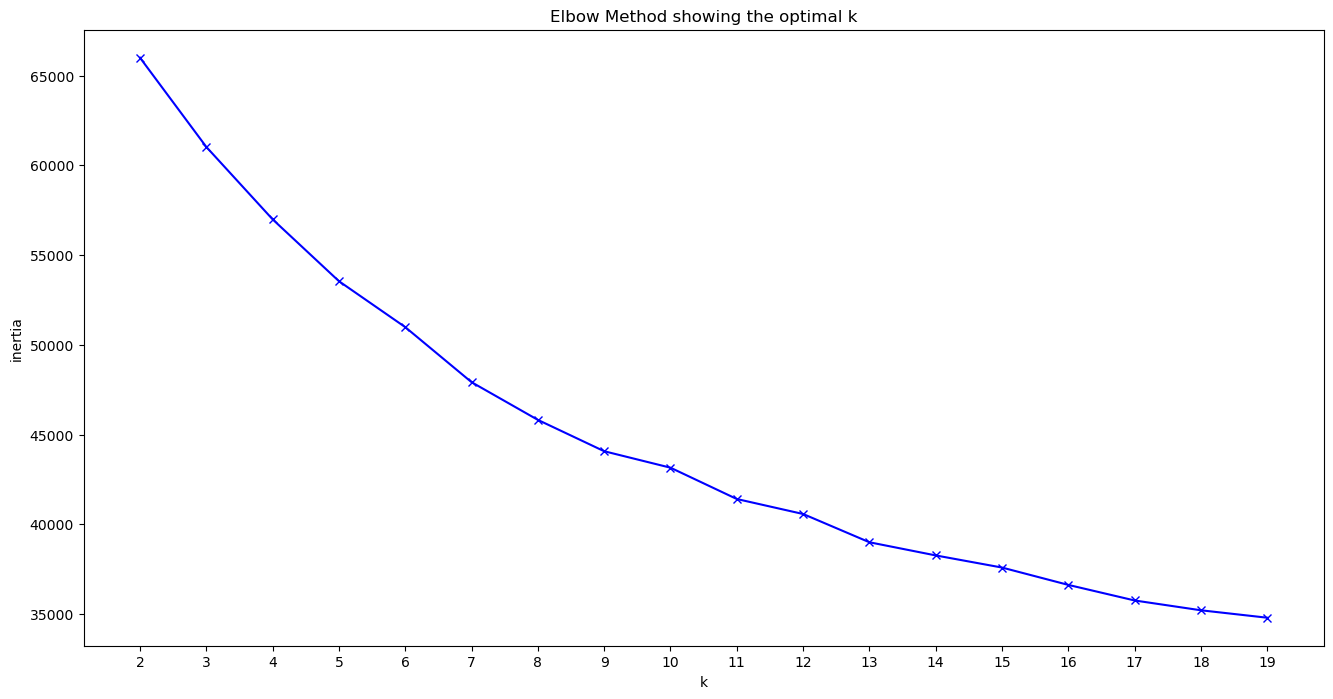

In [74]:
from sklearn.cluster import KMeans
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(data_prep)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

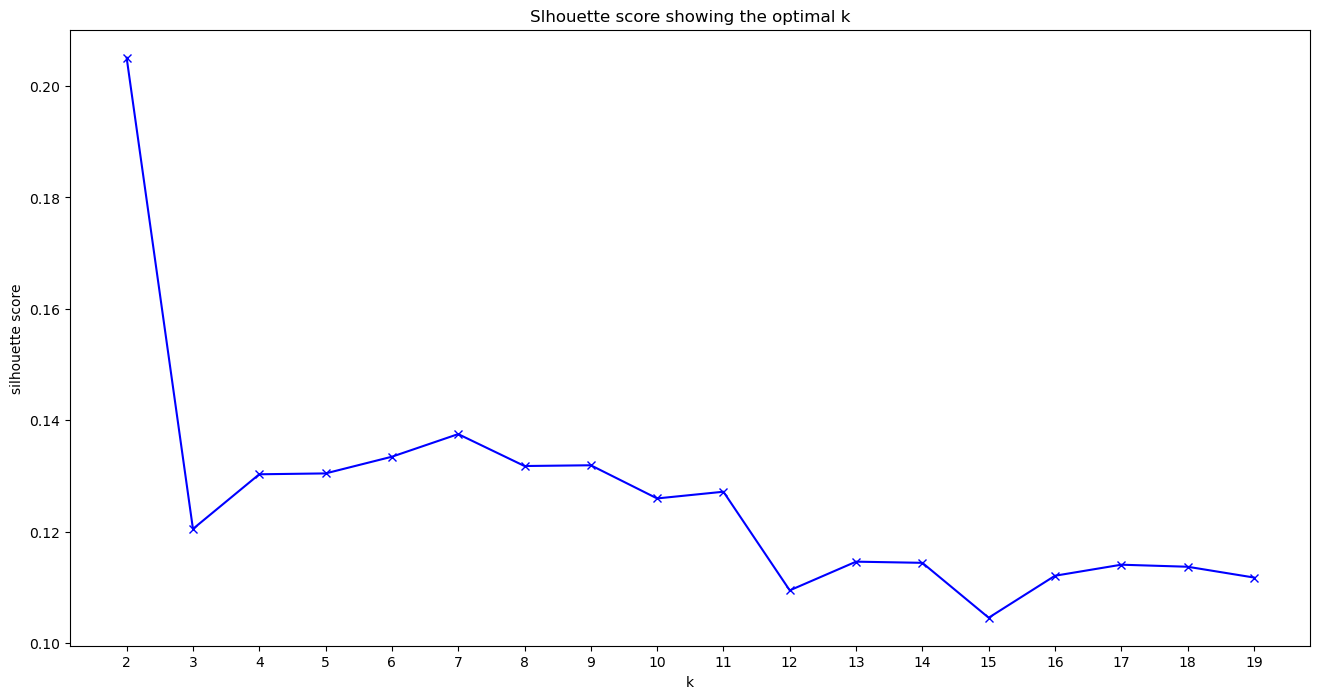

In [75]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(data_prep)
    silhouette.append(silhouette_score(data_prep, kmeans.predict(data_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

I will choose 7 clusters

In [80]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(data_prep)

KMeans(n_clusters=7, random_state=1234)

In [82]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(data_prep)

# Check the size of the clusters (3rd cluster is a bit too much)
pd.Series(clusters).value_counts().sort_index()

0    1302
1    1012
2     427
3    2092
4     316
5     297
6     492
dtype: int64

In [83]:
kmeans.inertia_ ##### 

47919.57233826648

In [84]:
playlist_clustered = playlist.assign(clusters = clusters)
playlist_clustered.head()

,title,artist,url,features_danceability,features_energy,features_key,features_loudness,features_mode,features_speechiness,features_acousticness,features_instrumentalness,features_liveness,features_valence,features_tempo,features_type,features_duration_ms,features_time_signature,clusters
0,Can't Help Falling in Love,Elvis Presley,https://open.spotify.com/track/44AyOl4qVkzS48v...,0.396,0.293,2.0,-14.062,1.0,0.0275,0.9410,0.000196,0.1050,0.343,100.307,audio_features,182360.0,3.0,4
1,Hound Dog,Elvis Presley,https://open.spotify.com/track/64Ny7djQ6rNJspq...,0.494,0.756,0.0,-8.492,1.0,0.0499,0.7330,0.005050,0.7600,0.949,86.895,audio_features,136027.0,4.0,6
2,Jailhouse Rock,Elvis Presley,https://open.spotify.com/track/452KBpASS5lZLeJ...,0.623,0.537,10.0,-10.014,0.0,0.0726,0.3320,0.000014,0.0963,0.905,166.885,audio_features,146933.0,4.0,0
3,Suspicious Minds,Elvis Presley,https://open.spotify.com/track/1H5IfYyIIAlgDX8...,0.487,0.382,7.0,-10.889,1.0,0.0309,0.0422,0.000005,0.4110,0.714,116.557,audio_features,261280.0,4.0,6
4,Burning Love,Elvis Presley,https://open.spotify.com/track/7zMUCLm1TN9o9Jl...,0.660,0.748,2.0,-11.206,1.0,0.0284,0.0993,0.005850,0.2830,0.972,143.549,audio_features,170293.0,4.0,3


### Part 4: Song Recommender

In [94]:
track = input("Enter a song that you love: ")


if top_100_songs['title'].str.lower().str.contains(str(track).lower()).any() == True:
        print('here what I found for you! ')
        print(top_100_songs['title'].sample())
else:
    # get the track name
    results = sp.search(q="track:" + track, type="track")
    
    # find the song uri with spotipy
    song_uri = results['tracks']['items'][0]['uri'].split(':')[2]
    
    #find song features
    song_features = sp.audio_features(song_uri)
    
    #clean song features
    new = pd.DataFrame.from_dict(song_features)
    y_pred = new.drop(columns=['type', 'id' , 'uri', 'track_href', 'analysis_url'])
    
    # scale the data
    y_scaled = transformer.transform(y_pred)
    y_scaled = pd.DataFrame(y_scaled,columns=y_pred.columns)
    
    # use the Kmeans created before to predict the cluster for the song
    look_for = kmeans.predict(y_scaled)
    print('Here what I found for you !!!')
    
    # choose a random row from the platlist with same cluster
    print(playlist_clustered.loc[playlist_clustered.clusters == look_for[0],['title','artist','url']].sample(1))

Enter a song that you love: my heart will go on
Here what I found for you !!!
               title          artist  \
1306  Tuesday's Gone  Lynyrd Skynyrd   

                                                    url  
1306  https://open.spotify.com/track/64sn7wgJfeQKY3J...  
